In [1]:
#Connect to static vereion of OSDB on Google Drive
from google.colab import drive
#Mount drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Core Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from itertools import cycle

# Statistical Imports ~ SKLearn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight
from sklearn import metrics
from keras.utils.np_utils import to_categorical
from sklearn.utils import resample
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Ai Imports
import tensorflow as tf
import keras
from keras import optimizers
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

# Ignore warnings in Python
warnings.filterwarnings('ignore')

In [3]:
# Store Column Names in Array
columns=['eventiD','userid','subType','type','outcome','hr','rd1','rd2','rd3','rd4','rd5','rd6','rd7','rd8','rd9','rd10','rd11','rd12','rd13','rd14','rd15','rd16','rd17','rd18','rd19','rd20','rd21','rd22','rd23','rd24','rd25','rd26','rd27','rd28','rd29','rd30','rd31','rd32','rd33','rd34','rd35','rd36','rd37','rd38','rd39','rd40','rd41','rd42','rd43','rd44','rd45','rd46','rd47','rd48','rd49','rd50','rd51','rd52','rd53','rd54','rd55','rd56','rd57','rd58','rd59','rd60','rd61','rd62','rd63','rd64','rd65','rd66','rd67','rd68','rd69','rd70','rd71','rd72','rd73','rd74','rd75','rd76','rd77','rd78','rd79','rd80','rd81','rd82','rd83','rd84','rd85','rd86','rd87','rd88','rd89','rd90','rd91','rd92','rd93','rd94','rd95','rd96','rd97','rd98','rd99','rd100','rd101','rd102','rd103','rd104','rd105','rd106','rd107','rd108','rd109','rd110','rd111','rd112','rd113','rd114','rd115','rd116','rd117','rd118','rd119','rd120','rd121','rd122','rd123','rd124','rd125']

# Replace URL with your own datasource URL
mypath = ''

#Read csv as dataframe
df = pd.read_csv(mypath, header = None, names = columns)
df.head()

,eventiD,userid,subType,type,outcome,hr,rd1,rd2,rd3,rd4,...,rd116,rd117,rd118,rd119,rd120,rd121,rd122,rd123,rd124,rd125
0,5368,53,Seizure,Atonic/Fall,1,68,1392.0,1424.0,1376.0,1424.0,...,1756.0,1620.0,1684.0,1468.0,1460.0,1732.0,1788.0,1516.0,1560.0,1660.0
1,5368,53,Seizure,Atonic/Fall,1,72,1828.0,1964.0,1764.0,1840.0,...,1640.0,1408.0,1100.0,916.0,836.0,904.0,984.0,840.0,852.0,1816.0
2,5368,53,Seizure,Atonic/Fall,1,72,1496.0,2488.0,2776.0,2008.0,...,3400.0,1864.0,1248.0,1276.0,1276.0,2532.0,1720.0,1508.0,1152.0,2216.0
3,5368,53,Seizure,Atonic/Fall,1,74,1148.0,1460.0,1164.0,868.0,...,944.0,1096.0,1276.0,1384.0,1360.0,1504.0,1588.0,1508.0,1392.0,1440.0
4,5368,53,Seizure,Atonic/Fall,1,79,1484.0,1480.0,1452.0,1396.0,...,2124.0,1668.0,1932.0,1832.0,1112.0,2192.0,2140.0,4504.0,1328.0,1580.0


In [4]:
# Get the list of column names
columns = df.columns.tolist()

# Remove 'subType' from the list of columns
columns.remove('outcome')

# Append 'subType' at the end of the list
columns.append('outcome')

# Reorder the columns in the dataframe
df = df[columns]

In [5]:
#Check if there are any null values in the dataframe
df.isnull()

,eventiD,userid,subType,type,hr,rd1,rd2,rd3,rd4,rd5,...,rd117,rd118,rd119,rd120,rd121,rd122,rd123,rd124,rd125,outcome
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5255,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5256,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5257,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5258,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
# Print Lables and features to see if they have same value

#Labels for the train dataset
train_labels = df[["outcome"]]
print(train_labels.shape)

#Print train_features.shape
train_features = df
print(train_features.shape)

(23136, 1)
(23136, 126)


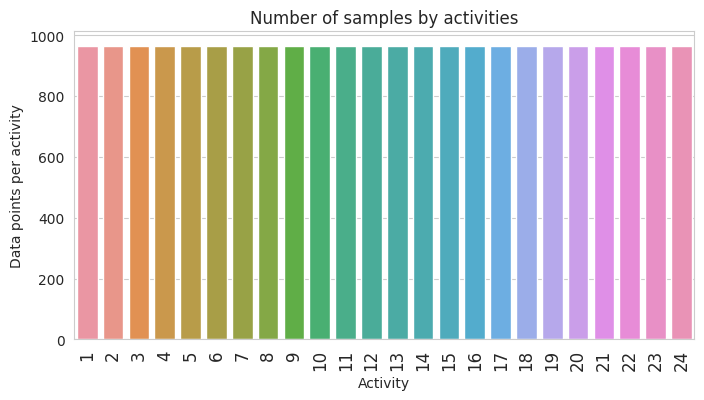

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Number of data points in class 20 = 964 ~ 4.17%
Number of data points in class 13 = 964 ~ 4.17%
Number of data points in class 19 = 964 ~ 4.17%
Number of data points in class 22 = 964 ~ 4.17%
Number of data points in class 18 = 964 ~ 4.17%
Number of data points in class 7 = 964 ~ 4.17%
Number of data points in class 21 = 964 ~ 4.17%
Number of data points in class 15 = 964 ~ 4.17%
Number of data points in class 6 = 964 ~ 4.17%
Number of data points in class 8 = 964 ~ 4.17%
Number of data points in class 17 = 964 ~ 4.17%
Number of data points in class 4 = 964 ~ 4.17%
Number of data points in class 11 = 964 ~ 4.17%
Number of data points in class 10 = 964 ~ 4.17%
Number of data points in class 3 = 964 ~ 4.17%
Number of data points in class 1 = 964 ~ 4.17%
Number of data points in class 2 = 964 ~ 4.17%
Number of data points in class 14 = 964 ~ 4.17%
Number of data points in class 9 = 964 ~ 4

In [18]:
# Analysis of class labels
label_dict = dict(df['outcome'].value_counts())
sns.set_style("whitegrid")
plt.figure(figsize = (8, 4))
sns.barplot(x = list(label_dict.keys()), y = list(label_dict.values()))
plt.xlabel('Activity')
plt.ylabel('Data points per activity')
plt.title('Number of samples by activities')
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90, fontsize=12)
plt.show()

# Percentage-wise distribution of the class label yi's
print("- "* 50)
for i in label_dict.keys():
  print("Number of data points in class {0} = {1} ~ {2}%".format(
  i, label_dict[i], round((label_dict[i]*100)/sum(label_dict.values()), 2)))

print("-"*50)
print("total datapoints:", sum(label_dict.values()))

In [19]:
#Group rows by unique outcome values (1 - 24)
groups = df.groupby('outcome')

#Resample the dataframe using new dataframe varibale resampled_df
resampled_df = pd.DataFrame()

# Find the max count value for any of the target class instances
target_count = groups.size().max()

# This code performs resampling on each group, concatenates the resampled groups, shuffles the resulting DataFrame, and resets the index.
for _, group in groups:
    resampled_group = resample(group, n_samples=target_count, replace=True, random_state=42)
    resampled_df = pd.concat([resampled_df, resampled_group])


# The result is a resampled DataFrame with balanced class distribution based on the target_count parameter.
resampled_df = resampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Change name of resampled_df to df
df = resampled_df

In [9]:
# Calculate the class distribution in the "outcome" column of a DataFrame df using the value_counts() functio
equilibre=df["outcome"].value_counts()

# Remove two columns name is 'C' and 'D'
df = df.drop(['eventiD','userid','subType','type','hr'], axis=1)

df.head()

,rd1,rd2,rd3,rd4,rd5,rd6,rd7,rd8,rd9,rd10,...,rd117,rd118,rd119,rd120,rd121,rd122,rd123,rd124,rd125,outcome
0,1018.93,1009.17,1009.81,996.16,1031.46,1019.10,996.65,988.02,997.40,1006.81,...,1001.14,1000.66,999.20,993.39,1008.39,1006.74,1004.98,1008.25,1003.47,20
1,1434.00,1442.00,1442.00,1448.00,1450.00,1444.00,1444.00,1448.00,1452.00,1430.00,...,1442.00,1460.00,1438.00,1436.00,1434.00,1442.00,1452.00,1444.00,1452.00,13
2,1001.92,1000.08,1000.05,1004.58,1000.27,1003.13,1000.31,1000.82,1000.07,1004.30,...,1002.65,1000.13,1002.58,1013.48,1006.17,993.65,1006.52,997.54,1006.64,20
3,997.15,1065.26,1047.98,1014.05,1023.13,1032.05,1043.21,1028.96,1031.04,1031.22,...,1030.57,1029.96,1030.72,1031.62,1031.43,1030.37,1046.88,1027.51,1024.57,23
4,2112.00,1992.00,2148.00,1596.00,1524.00,1284.00,2100.00,1860.00,1368.00,1536.00,...,1512.00,1536.00,1524.00,1536.00,1596.00,1524.00,1512.00,1572.00,1596.00,16


In [20]:
# Groups the DataFrame df by the "outcome" column and then selects a random sample of one row from each group
# The apply(lambda df: df.sample(1)) function is then applied to each group, selecting one random row from each group.
c=df.groupby("outcome",group_keys=False).apply(lambda df : df.sample(1))

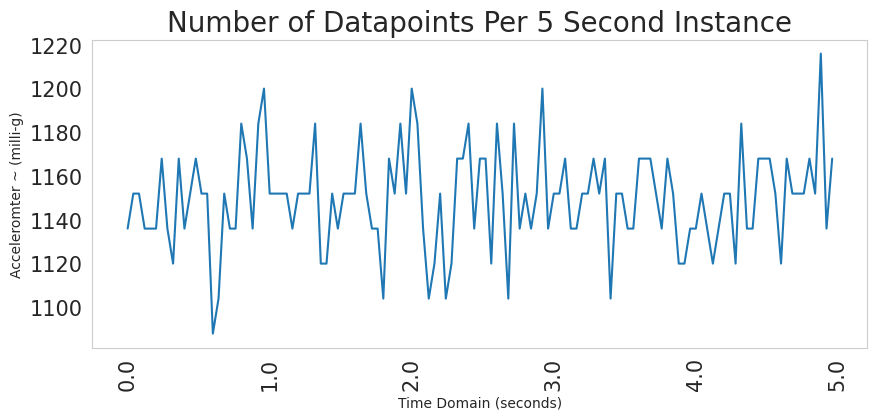

In [21]:
label_dict = dict(c['outcome'].value_counts())
sns.set_style("whitegrid")
plt.figure(figsize=(10, 4))
plt.plot(c.iloc[0, :125])

time_per_tick = 5 / 125  # 5 seconds divided by 125 data points per second = 0.04 seconds per data point
x_ticks = [i * time_per_tick for i in range(0, 126, 25)]  # Generate time values for ticks (0, 1, 2, 3, 4, 5)
plt.xticks(range(0, 126, 25), x_ticks, rotation=90, fontsize=15)

plt.xlabel('Time Domain (seconds)')
plt.ylabel('Acceleromter ~ (milli-g)')
plt.title('Number of Datapoints Per 5 Second Instance', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(False)
plt.show()


In [22]:
# Quick Experiment to evaluate the applcation of randomness
def add_gaussian_noise(signal):
    noise=np.random.normal(1,0,125)
    return (signal+noise)

# Needs Further Investigation !!!
tempo = c.iloc[0, :125]
bruiter = add_gaussian_noise(tempo)

In [38]:
import pandas as pd

# Step 1: Print all unique values in the column
unique_values = df['outcome'].unique()
print("Unique values in the column:")
len(unique_values)

Unique values in the column:


24

In [50]:
# Extract the target labels from the DataFrame 'df' for the training dataset
target_train = df["outcome"]
adjusted_target_train = target_train - 1

# Extract the target labels from the DataFrame 'df' for the test dataset
target_test = df["outcome"]
adjusted_target_test = target_train - 1

# Convert the target labels for the training dataset into one-hot encoded format
# This means converting each label to a binary vector with 1 in the position corresponding to the label value
y_train = to_categorical(adjusted_target_train)

# Convert the target labels for the test dataset into one-hot encoded format
y_test = to_categorical(adjusted_target_test)

In [55]:
X_train = df.iloc[:, :125].values
X_test = df.iloc[:, :125].values

# Add Gaussian Noise Function To Signal Data
for i in range(len(X_train)):
    X_train[i, :125] = add_gaussian_noise(X_train[i, :125])

In [56]:
# Network Variables
optimizer = optimizers.Adam(learning_rate=0.001)

# Loss function
loss = 'categorical_crossentropy'

# NADAM optimizer has been chosen for this model. Epsilon score has been reduced to try and increase numerical stability
nadam = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-05, name="Nadam")

# Create CNN Neural Network
def network(X_train,y_train,X_test,y_test):

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')

    # Convolutional layers with batch normalization and pooling
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)

    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)

    conv3_1=Convolution1D(128, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)

    conv4_1=Convolution1D(128, (3), activation='relu', input_shape=im_shape)(pool3)
    conv4_1=BatchNormalization()(conv4_1)
    pool4=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv4_1)

    flatten=Flatten()(pool3)

    # Dense layers
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)

    # Output layer
    main_output = Dense(24, activation='softmax', name='main_output')(dense_end2)

    model = Model(inputs= inputs_cnn, outputs=main_output)

    # Compile the model
    model.compile(optimizer=nadam, loss='mean_squared_error', metrics="accuracy")

    callbacks = [EarlyStopping(monitor='val_loss', patience=8), ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    # Train the model
    history=model.fit(X_train, y_train,epochs=60, batch_size=32,validation_data=(X_test,y_test))

    return(model,history)


In [ ]:
# Train Model
model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/60
723/723 [==============================] - 31s 38ms/step - loss: 0.0285 - accuracy: 0.4272 - val_loss: 0.0369 - val_accuracy: 0.2189
Epoch 2/60
723/723 [==============================] - 32s 44ms/step - loss: 0.0187 - accuracy: 0.6435 - val_loss: 0.0431 - val_accuracy: 0.1629
Epoch 3/60
723/723 [==============================] - 32s 44ms/step - loss: 0.0149 - accuracy: 0.7231 - val_loss: 0.0320 - val_accuracy: 0.3968
Epoch 4/60
723/723 [==============================] - 30s 41ms/step - loss: 0.0120 - accuracy: 0.7830 - val_loss: 0.0255 - val_accuracy: 0.5344
Epoch 5/60
723/723 [==============================] - 27s 37ms/step - loss: 0.0104 - accuracy: 0.8163 - val_loss: 0.0409 - val_accuracy: 0.3009
Epoch 6/60
483/723 [===================>..........] - ETA: 7s - loss: 0.0090 - accuracy: 0.8439

In [29]:
# Evaluate Nerual Networks Performance
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=1)
    print("accuracy: %.2f%%" % (scores[1]*100))
    print(history)

    # 1. Accuracy Plot
    print("\n")
    print(" **** 1. Accuracy Plot ****")
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.title('Model - accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

    # 2. Loss Plot
    print("\n")
    print(" **** 2.  Loss Plot ****")
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()


    # 3. Confusion Matrix
    print("\n")
    print(" **** 3. Confusion Matrix Plot ****")
    y_true=[]
    labels=[ "Atonic/Fall", "Aura/Focal",  "Brushing Teeth", "Cycling",  "Fidigting", "Gaming", "Hammock", "Lying Down", "Motor Vehicle", "Other", "Pushing Pram",   "Scratching",   "Conv Seizure",  "Shaving",  "Shopping",  "Sleeping",   "Sneezing",  "Sorting",  "Standing",  "Talking",  "Tonic-Clonic",  "Typing",  "Unknown",  "Washing Up"]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cm = confusion_matrix(y_true, prediction)
    fig = plt.figure(figsize=(10, 10))
    sns.heatmap(cm, xticklabels=labels, yticklabels=labels, annot=True, linewidths = 0.2, fmt="d", cmap = 'Blues')
    plt.ylabel('Predicted Class')
    plt.xlabel('Actual Class')
    plt.show()


    # 4. Test data loss & accuracy
    print("\n")
    print(" **** 4. Test data loss & accuracy ****")
    loss, accuracy = model.evaluate(X_train, y_train, verbose = 1)
    print("Test Accuracy :", accuracy)
    print("Test Loss :", loss)


    # 5. Test Model to Make Prediction
    print("\n")
    print(" **** 5. Test Model to Make Prediction ****")
    y_pred=model.predict(X_test)


    # 6. Classification report
    print("\n")
    print(" **** 6. Classification report ****")
    print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))


   # 7. Classification Analysis
    print("\n")
    print(" **** 7. Classification Analysis****")

    # Extract TP, TN, FP, FN from the confusion matrix
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

    # Calculate additional evaluation metrics
    TPR = TP / (TP + FN)  # True Positive Rate (Sensitivity or Recall)
    FPR = FP / (FP + TN)  # False Positive Rate
    PPV = TP / (TP + FP)  # Positive Predictive Value (Precision)
    MCC = (TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5  # Matthews Correlation Coefficient
    FNR = FN / (FN + TP)  # False Negative Rate
    TNR = TN / (TN + FP)  # True Negative Rate (Specificity)
    FDR = FP / (FP + TP)  # False Discovery Rate
    ACC = (TP + TN) / (TP + TN + FP + FN)  # Accuracy
    SPC = TN / (TN + FP)  # Specificity
    PREV = (TP + FN) / (TP + TN + FP + FN)  # Prevalence
    F1 = 2 * (PPV * TPR) / (PPV + TPR)  # F1-Score
    FOR = FN / (FN + TN)  # False Omission Rate
    NPV = TN / (TN + FN)  # Negative Predictive Value
    BM = TPR + TNR - 1  # Informedness
    MK = PPV + NPV - 1  # Markedness

    print("True Positives (TP):", TP)
    print("True Negatives (TN):", TN)
    print("False Positives (FP):", FP)
    print("False Negatives (FN):", FN)
    print("True Positive Rate (TPR):", TPR)
    print("False Positive Rate (FPR):", FPR)
    print("Positive Predictive Value (PPV):", PPV)
    print("Matthews Correlation Coefficient (MCC):", MCC)
    print("False Negative Rate (FNR):", FNR)
    print("True Negative Rate (TNR):", TNR)
    print("False Discovery Rate (FDR):", FDR)
    print("Accuracy (ACC):", ACC)
    print("Specificity (SPC):", SPC)
    print("Prevalence (PREV):", PREV)
    print("F1-Score:", F1)
    print("False Omission Rate (FOR):", FOR)
    print("Negative Predictive Value (NPV):", NPV)
    print("Informedness (BM):", BM)
    print("Markedness (MK):", MK)


    # 8. Multi Class AUC ROC Curve
    print("\n")
    print(" **** 8. Multi Class AUC ROC Curve****")

    # Compute the ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
    n_classes = y_test_bin.shape[1]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curves for each class
    plt.figure(figsize=(10, 7))
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown'])  # Add more colors as needed
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=5)
    plt.ylim([0.8, 1.0])  # Set the y-axis limits
    plt.show()


723/723 [==============================] - 10s 14ms/step - loss: 0.0112 - accuracy: 0.8262
accuracy: 82.62%


 **** 1. Accuracy Plot ****


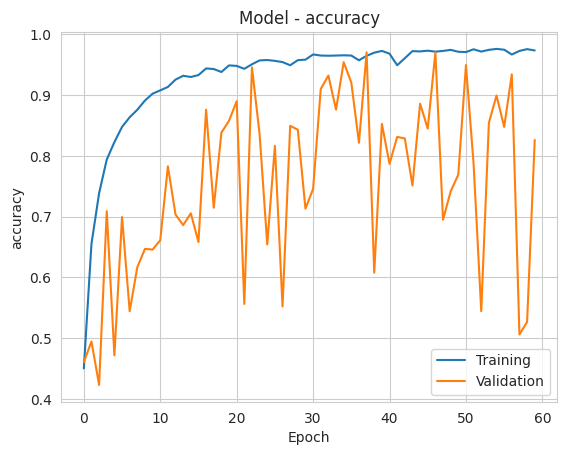



 **** 2.  Loss Plot ****


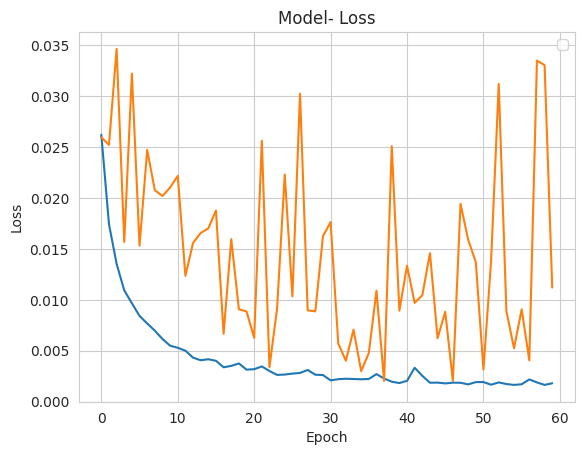



 **** 3. Confusion Matrix Plot ****
723/723 [==============================] - 8s 10ms/step


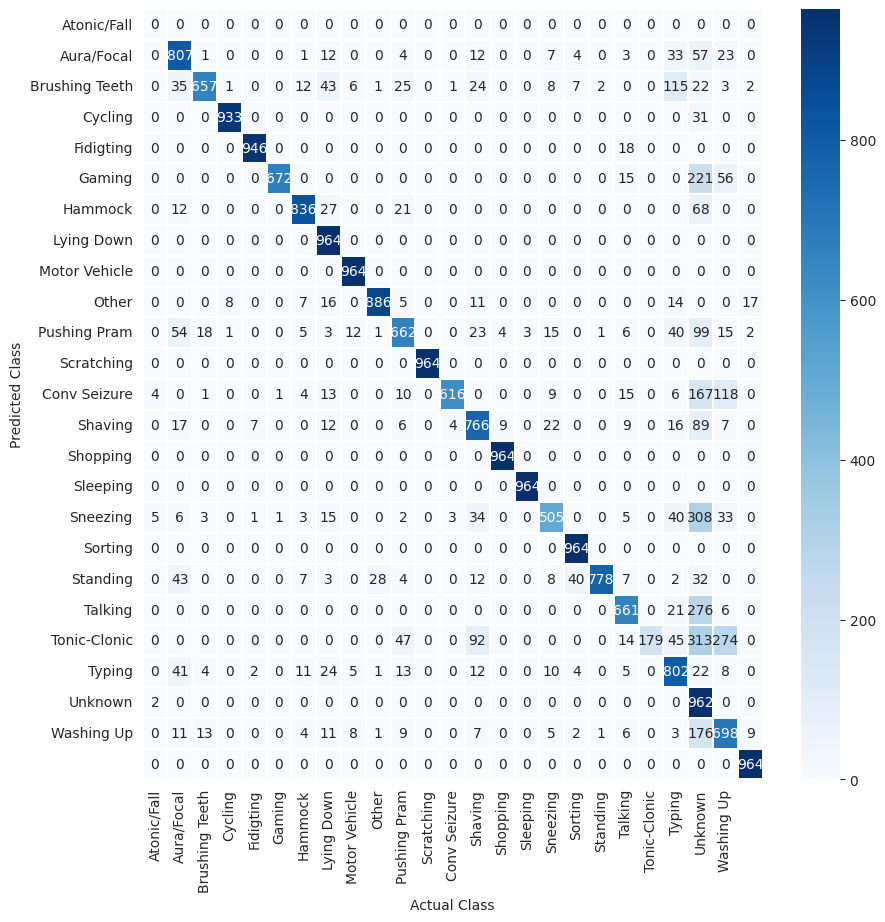



 **** 4. Test data loss & accuracy ****
723/723 [==============================] - 5s 8ms/step - loss: 0.0112 - accuracy: 0.8265
Test Accuracy : 0.8265041708946228
Test Loss : 0.011225595138967037


 **** 5. Test Model to Make Prediction ****
723/723 [==============================] - 5s 7ms/step


 **** 6. Classification report ****
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.79      0.84      0.81       964
           2       0.94      0.68      0.79       964
           3       0.99      0.97      0.98       964
           4       0.99      0.98      0.99       964
           5       1.00      0.70      0.82       964
           6       0.94      0.87      0.90       964
           7       0.84      1.00      0.92       964
           8       0.97      1.00      0.98       964
           9       0.97      0.92      0.94       964
          10       0.82      0.69      0.75       964
          11 

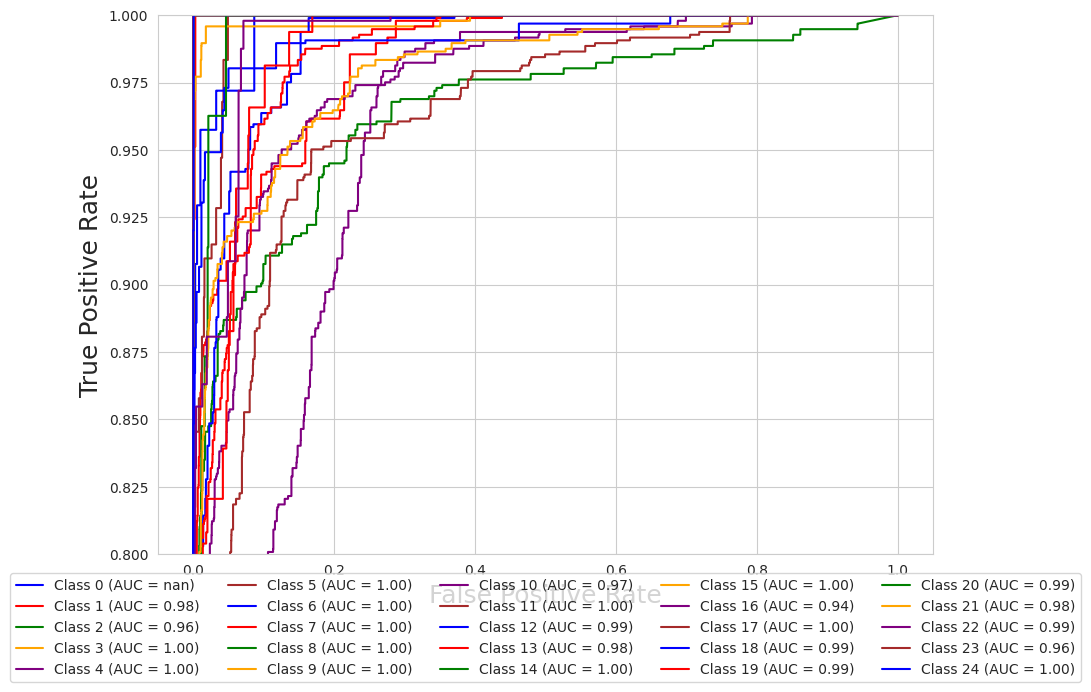

In [30]:
# Call Function to Run Performance Summariser
evaluate_model(history,X_test,y_test,model)

In [ ]:
# Save Model
model.save("/content/gdrive/MyDrive/model.h5")

# Load Model
loaded_model = load_model("/content/gdrive/MyDrive/model.h5")